## Import the required libraries and the utility modules

In [1]:
import numpy as np
import pandas as pd

from sklearn import metrics
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import plot_model
from tensorflow.keras import regularizers

#Custom libraries
#Data formating library
from dataloadinglibrary import loadCSV

from datainspectionlibrary import getStatisticsOfData

from dataformatinglibrary import createExcelFromArray

from defineInputs import getLabelName
from defineInputs import getPathToTrainingAndTestingDataSets
from defineInputs import modelPerformanceReport
from defineInputs import defineArrayForPreProcessing

from util import performPreprocessing

### Load the training dataset and check the statistics

In [2]:
#Define file names and call loadCSV to load the CSV files
trainingFileNameWithAbsolutePath, testingFileNameWithAbsolutePath = getPathToTrainingAndTestingDataSets()
trainingDataSet = loadCSV(trainingFileNameWithAbsolutePath)
difficultyLevel = trainingDataSet.pop('difficulty_level')
labelName = getLabelName()
label = trainingDataSet[labelName]

#Look at the statistics of the dataSet
getStatisticsOfData(trainingDataSet)
print("\n***** Here is how to training dataset looks like before performing any pre-processing *****")
trainingDataSet.head()

***** Start checking the statistics of the dataSet *****

***** Shape (number of rows and columns) in the dataset:  (25191, 42)
***** Total number of features in the dataset:  41
***** Number of categorical features in the dataset:  3
***** Number of numerical features in the dataset:  38

***** Names of categorical features in dataset *****

| Categorical features in dataset   |
|-----------------------------------|
| Protocol_type                     |
| Service                           |
| Flag                              |


***** Names of numerical features in dataset *****

| Numerical features in the dataset   |
|-------------------------------------|
| Duration                            |
| Src_bytes                           |
| Dst_bytes                           |
| Land                                |
| Wrong_fragment                      |
| Urgent                              |
| Hot                                 |
| Num_failed_logins                   |
| Logged_in

,Duration,Protocol_type,Service,Flag,Src_bytes,Dst_bytes,Land,Wrong_fragment,Urgent,Hot,...,Dst_host_srv_count,Dst_host_same_srv_rate,Dst_host_diff_srv_rate,Dst_host_same_src_port_rate,Dst_host_srv_diff_host_rate,Dst_host_serror_rate,Dst_host_srv_serror_rate,Dst_host_rerror_rate,Dst_host_srv_rerror_rate,attack_type
0,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune
2,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune


### Load the testing dataset and check the statistics

In [3]:
#Define file names and call loadCSV to load the CSV files
testingDataSet = loadCSV(testingFileNameWithAbsolutePath)
difficultyLevel = testingDataSet.pop('difficulty_level')

#Look at the statistics of the dataSet
getStatisticsOfData(testingDataSet)
print("\n***** Here is how to testing dataset looks like before performing any pre-processing *****")
testingDataSet.head()

***** Start checking the statistics of the dataSet *****

***** Shape (number of rows and columns) in the dataset:  (11850, 42)
***** Total number of features in the dataset:  41
***** Number of categorical features in the dataset:  3
***** Number of numerical features in the dataset:  38

***** Names of categorical features in dataset *****

| Categorical features in dataset   |
|-----------------------------------|
| Protocol_type                     |
| Service                           |
| Flag                              |


***** Names of numerical features in dataset *****

| Numerical features in the dataset   |
|-------------------------------------|
| Duration                            |
| Src_bytes                           |
| Dst_bytes                           |
| Land                                |
| Wrong_fragment                      |
| Urgent                              |
| Hot                                 |
| Num_failed_logins                   |
| Logged_in

,Duration,Protocol_type,Service,Flag,Src_bytes,Dst_bytes,Land,Wrong_fragment,Urgent,Hot,...,Dst_host_srv_count,Dst_host_same_srv_rate,Dst_host_diff_srv_rate,Dst_host_same_src_port_rate,Dst_host_srv_diff_host_rate,Dst_host_serror_rate,Dst_host_srv_serror_rate,Dst_host_rerror_rate,Dst_host_srv_rerror_rate,attack_type
0,13,tcp,telnet,SF,118,2425,0,0,0,0,...,10,0.38,0.12,0.04,0.0,0.00,0.00,0.12,0.3,guess_passwd
1,0,udp,private,SF,44,0,0,0,0,0,...,254,1.00,0.01,0.01,0.0,0.00,0.00,0.00,0.0,snmpguess
2,0,tcp,telnet,S3,0,44,0,0,0,0,...,79,0.31,0.61,0.00,0.0,0.21,0.68,0.60,0.0,processtable
3,0,udp,private,SF,53,55,0,0,0,0,...,255,1.00,0.00,0.87,0.0,0.00,0.00,0.00,0.0,normal
4,0,tcp,private,SH,0,0,0,0,0,0,...,1,0.06,1.00,1.00,0.0,1.00,1.00,0.00,0.0,nmap


### Perform pre-processing

In [4]:
arrayOfModels = defineArrayForPreProcessing()
completeEncodedAndScaledDataset = performPreprocessing(trainingDataSet, testingDataSet, arrayOfModels)
completeEncodedAndScaledDataset.head()

[['ExtraTreesClassifier', 'OneHotEncoder', 'Standardization']]
***************************************************************************************************************************
********************************************* Building Model- 0  As Below *************************************************
	 -- Feature Selection: 	  ExtraTreesClassifier  
	 -- Feature Encoding: 	  OneHotEncoder  
	 -- Feature Scaling: 	  Standardization 

completeDataSet.shape:  (37041, 43)
completeDataSet.head:     Duration Protocol_type  Service Flag  Src_bytes  Dst_bytes  Land  \
0         0           udp    other   SF        146          0     0   
1         0           tcp  private   S0          0          0     0   
2         0           tcp     http   SF        232       8153     0   
3         0           tcp     http   SF        199        420     0   
4         0           tcp  private  REJ          0          0     0   

   Wrong_fragment  Urgent  Hot  ...  Dst_host_same_srv_rate  \
0    


****** Number of features in the dataset after performing scaling:  19

****** Features in the dataset after performing scaling ***** 
 [[ 2.03857058  0.6299765   0.73536923 ... -0.54981386 -0.48776502
  -0.85380057]
 [-0.15478617  0.93890397 -0.66099165 ...  1.89967409 -0.48776502
   0.22813874]
 [-0.15478617 -0.54394786  0.73536923 ... -0.52531898 -0.48776502
   0.76910839]
 ...
 [-0.15478617  1.61854439 -1.70826232 ... -0.35385482  2.03171007
  -1.39477022]
 [-0.15478617  1.43318791 -2.05735254 ... -0.54981386  2.12063272
  -0.85380057]
 [ 2.03857058  0.93890397  0.73536923 ... -0.54981386 -0.48776502
  -0.31283092]]
scaledFeatures.head():     Protocol_type   Service      Flag  Src_bytes  Logged_in     Count  \
0       2.038571  0.629977  0.735369  -0.011190  -0.732914 -0.581217   
1      -0.154786  0.938904 -0.660992  -0.011262  -0.732914  0.275339   
2      -0.154786 -0.543948  0.735369  -0.011147   1.364417 -0.643512   
3      -0.154786 -0.543948  0.735369  -0.011163   1.364417 

,Protocol_type,Service,Flag,Src_bytes,Logged_in,Count,Serror_rate,Srv_serror_rate,Same_srv_rate,Diff_srv_rate,Dst_host_count,Dst_host_srv_count,Dst_host_same_srv_rate,Dst_host_diff_srv_rate,Dst_host_same_src_port_rate,Dst_host_serror_rate,Dst_host_srv_serror_rate,Dst_host_rerror_rate,difficulty_level,attack_type
0,2.038571,0.629977,0.735369,-0.011190,-0.732914,-0.581217,-0.556584,-0.552030,-1.421427,0.233303,0.656445,-1.050270,-1.193023,2.187298,2.137976,-0.561390,-0.549814,-0.487765,-0.853801,normal
1,-0.154786,0.938904,-0.660992,-0.011262,-0.732914,0.275339,1.851192,1.851769,-1.491319,-0.092358,0.656445,-0.821669,-0.966271,-0.237144,-0.498320,1.904034,1.899674,-0.487765,0.228139,neptune
2,-0.154786,-0.543948,0.735369,-0.011147,1.364417,-0.643512,-0.075029,-0.071270,0.721924,-0.377312,-1.709884,1.272317,1.074493,-0.457548,-0.408446,-0.487427,-0.525319,-0.487765,0.769108,normal
3,-0.154786,-0.543948,0.735369,-0.011163,1.364417,-0.448840,-0.556584,-0.552030,0.721924,-0.377312,0.656445,1.272317,1.074493,-0.457548,-0.498320,-0.561390,-0.549814,-0.487765,0.769108,normal
4,-0.154786,0.938904,-2.057353,-0.011262,-0.732914,0.259766,-0.556584,-0.552030,-1.235049,-0.133066,0.656445,-0.885678,-1.034297,-0.148983,-0.498320,-0.561390,-0.549814,2.476323,0.769108,neptune


### After preprocessing, check the shape of the features and label

In [5]:
x = completeEncodedAndScaledDataset.drop('attack_type',axis=1)
y = completeEncodedAndScaledDataset['attack_type']
print(x.shape, y.shape)
print(len(x.columns))
print(x.columns)

(37041, 19) (37041,)
19
Index(['Protocol_type', 'Service', 'Flag', 'Src_bytes', 'Logged_in', 'Count',
       'Serror_rate', 'Srv_serror_rate', 'Same_srv_rate', 'Diff_srv_rate',
       'Dst_host_count', 'Dst_host_srv_count', 'Dst_host_same_srv_rate',
       'Dst_host_diff_srv_rate', 'Dst_host_same_src_port_rate',
       'Dst_host_serror_rate', 'Dst_host_srv_serror_rate',
       'Dst_host_rerror_rate', 'difficulty_level'],
      dtype='object')


In [6]:
np.unique(y)
y.value_counts()

normal             15600
neptune             9861
satan               1418
guess_passwd        1241
smurf               1156
mscan                996
warezmaster          951
ipsweep              851
portsweep            743
apache2              737
processtable         685
back                 555
nmap                 374
snmpguess            331
saint                309
mailbomb             293
teardrop             200
warezclient          181
snmpgetattack        178
httptunnel           133
pod                   79
buffer_overflow       26
multihop              20
rootkit               17
named                 17
ps                    15
sendmail              14
xterm                 13
xlock                  9
land                   8
imap                   6
xsnoop                 4
ftp_write              4
phf                    4
loadmodule             3
perl                   2
sqlattack              2
worm                   2
udpstorm               2
spy                    1


### Split the normal data and fraud data

In [7]:
x_normal , x_fraud = x[y=='normal'], x[y!='normal']
print(x_normal.shape, x_fraud.shape)

(15600, 19) (21441, 19)


### Start creating the autoencoder 

In [8]:
def auto_encoder(x, layers):
  rlayers=layers[::-1]
  input_layer = Input(shape=(x.shape[1],))
  encoded=Dense(layers[0], activation='relu' , activity_regularizer=regularizers.l2(10e-5))(input_layer)
  for l in layers[1:]:
    encoded= Dense(l, activation='relu')(encoded)
  decoded=Dense(rlayers[0], activation='relu' )(encoded)
  for l in rlayers[1:]:
    decoded=Dense(l, activation='relu')(decoded)
  output_layer = Dense(x.shape[1], activation='relu')(decoded)

  
  return input_layer,output_layer

### Define the autoencoder

In [9]:
layers=[300,100,25]
in_layer, out_layer = auto_encoder(x_normal,layers)
autoencoder = Model(in_layer,out_layer)
autoencoder.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 19)                0         
_________________________________________________________________
dense (Dense)                (None, 300)               6000      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 25)                2525      
_________________________________________________________________
dense_3 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_4 (Dense)              (None, 100)               2600      
_________________________________________________________________
dens

### Compile the autoencoder

In [10]:
autoencoder.compile(optimizer='rmsprop', loss='mse')

Instructions for updating:
Use tf.cast instead.


### Fit the autoencoder

In [11]:
auto_hist= autoencoder.fit(x_normal, x_normal, batch_size=16, epochs=100, shuffle=True, validation_split=0.2)

Train on 12480 samples, validate on 3120 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
12480/12480 [==============================] - 9s 736us/sample - loss: 0.2891 - val_loss: 0.3448
Epoch 2/100
12480/12480 [==============================] - 3s 214us/sample - loss: 0.2601 - val_loss: 0.3251
Epoch 3/100
12480/12480 [==============================] - 3s 216us/sample - loss: 0.2572 - val_loss: 0.3251
Epoch 4/100
12480/12480 [==============================] - 3s 215us/sample - loss: 0.2561 - val_loss: 0.3277
Epoch 5/100
12480/12480 [==============================] - 3s 214us/sample - loss: 0.2555 - val_loss: 0.3206
Epoch 6/100
12480/12480 [==============================] - 3s 219us/sample - loss: 0.2551 - val_loss: 0.3236
Epoch 7/100
12480/12480 [==============================] - 3s 216us/sample - loss: 0.2549 - val_loss: 0.3116
Epoch 8/100
12480/12480 [==============================] - 3s 217us/sample - loss: 0.2547 - val_loss: 0.3155
Epoch 9/100
12480/12480 [======

Epoch 73/100
12480/12480 [==============================] - 3s 230us/sample - loss: 0.2522 - val_loss: 0.3089
Epoch 74/100
12480/12480 [==============================] - 3s 224us/sample - loss: 0.2522 - val_loss: 0.3101
Epoch 75/100
12480/12480 [==============================] - 3s 229us/sample - loss: 0.2522 - val_loss: 0.3073
Epoch 76/100
12480/12480 [==============================] - 3s 222us/sample - loss: 0.2522 - val_loss: 0.3082
Epoch 77/100
12480/12480 [==============================] - 3s 225us/sample - loss: 0.2522 - val_loss: 0.3157
Epoch 78/100
12480/12480 [==============================] - 3s 223us/sample - loss: 0.2523 - val_loss: 0.3084
Epoch 79/100
12480/12480 [==============================] - 3s 225us/sample - loss: 0.2522 - val_loss: 0.3122
Epoch 80/100
12480/12480 [==============================] - 3s 223us/sample - loss: 0.2522 - val_loss: 0.3104
Epoch 81/100
12480/12480 [==============================] - 3s 234us/sample - loss: 0.2522 - val_loss: 0.3108
Epoch 82/1

### Plot the autoencoder los curves for all the epochs, as it is being fit

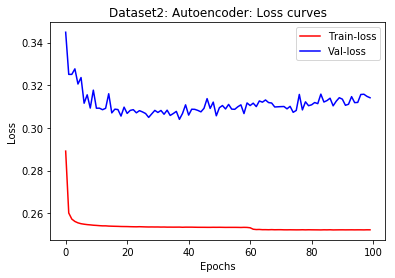

In [21]:
plt.plot(range(100), auto_hist.history['loss'],'r', label='Train-loss')
plt.plot(range(100), auto_hist.history['val_loss'],'b', label='Val-loss')
plt.title('Dataset2: Autoencoder: Loss curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

### Create the hidden layers in the neural network using the layers from the autoencoder

In [22]:
hidden =Sequential()
hidden.add(autoencoder.layers[0])
hidden.add(autoencoder.layers[1])
hidden.add(autoencoder.layers[2])
hidden.add(autoencoder.layers[3])
hidden.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 300)               6000      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 25)                2525      
Total params: 38,625
Trainable params: 38,625
Non-trainable params: 0
_________________________________________________________________


In [23]:
normal_hidden= hidden.predict(x_normal)
fraud_hidden = hidden.predict(x_fraud)
print(normal_hidden.shape, fraud_hidden.shape)

(15600, 25) (21441, 25)


In [24]:
rep_x = np.append(normal_hidden, fraud_hidden, axis=0)
y_normal = np.zeros(normal_hidden.shape[0])
y_fraud = np.ones(fraud_hidden.shape[0])
rep_y = np.append(y_normal,y_fraud)

x_lat=rep_x
y_lat=rep_y
print(x_lat.shape, y_lat.shape)

(37041, 25) (37041,)


## Build a neural Network model

In [25]:
'''
This function is used to define, compile and filt a neural network
'''
def nn_model(trainx, trainy, valx,valy,bt_size,epochs, layers):
  model = Sequential()
  model.add(Dense(layers[0],activation='relu', input_shape=(trainx.shape[1],)))
  for l in layers[1:]:
    model.add(Dense(l, activation='relu' ))
    model.add(Dropout(0.30))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  hist=model.fit(trainx, trainy, batch_size=bt_size, epochs=epochs, shuffle=True, validation_data=(valx,valy), verbose=True)
  return hist

In [26]:
layers=[1000,800,500,400,300,200,100,50,10]
trainx, testx, trainy, testy = train_test_split(x_lat,y_lat, test_size=0.25, random_state=42)
hist = nn_model(trainx, trainy, testx, testy,16,100,layers)

Train on 27780 samples, validate on 9261 samples
Epoch 1/100
27780/27780 [==============================] - 12s 438us/sample - loss: 0.2002 - acc: 0.9306 - val_loss: 0.0979 - val_acc: 0.9747
Epoch 2/100
27780/27780 [==============================] - 11s 409us/sample - loss: 0.1303 - acc: 0.9595 - val_loss: 0.0806 - val_acc: 0.9757
Epoch 3/100
27780/27780 [==============================] - 11s 410us/sample - loss: 0.1146 - acc: 0.9690 - val_loss: 0.0976 - val_acc: 0.9733
Epoch 4/100
27780/27780 [==============================] - 11s 410us/sample - loss: 0.1048 - acc: 0.9679 - val_loss: 0.1286 - val_acc: 0.9741
Epoch 5/100
27780/27780 [==============================] - 12s 417us/sample - loss: 0.1066 - acc: 0.9703 - val_loss: 0.1735 - val_acc: 0.9624
Epoch 6/100
27780/27780 [==============================] - 11s 413us/sample - loss: 0.0960 - acc: 0.9707 - val_loss: 0.2718 - val_acc: 0.9327
Epoch 7/100
27780/27780 [==============================] - 12s 419us/sample - loss: 0.1027 - acc: 0

27780/27780 [==============================] - 12s 428us/sample - loss: 0.0566 - acc: 0.9839 - val_loss: 0.0689 - val_acc: 0.9842
Epoch 59/100
27780/27780 [==============================] - 12s 440us/sample - loss: 0.1003 - acc: 0.9806 - val_loss: 0.0788 - val_acc: 0.9771
Epoch 60/100
27780/27780 [==============================] - 12s 428us/sample - loss: 0.0709 - acc: 0.9834 - val_loss: 0.0750 - val_acc: 0.9854
Epoch 61/100
27780/27780 [==============================] - 12s 427us/sample - loss: 0.0962 - acc: 0.9775 - val_loss: 0.0660 - val_acc: 0.9810
Epoch 62/100
27780/27780 [==============================] - 12s 433us/sample - loss: 0.0913 - acc: 0.9767 - val_loss: 0.0693 - val_acc: 0.9783
Epoch 63/100
27780/27780 [==============================] - 12s 429us/sample - loss: 0.0947 - acc: 0.9778 - val_loss: 0.0640 - val_acc: 0.9789
Epoch 64/100
27780/27780 [==============================] - 12s 427us/sample - loss: 0.0538 - acc: 0.9837 - val_loss: 0.0570 - val_acc: 0.9828
Epoch 65/100

In [27]:
print('MAX Accuracy during training: ',max(hist.history['acc'])*100)
print('MAX Accuracy during validation: ',max(hist.history['val_acc'])*100)

MAX Accuracy during training:  98.60691428184509
MAX Accuracy during validation:  98.58546853065491


## Polt the training accuracy and testing accuracy

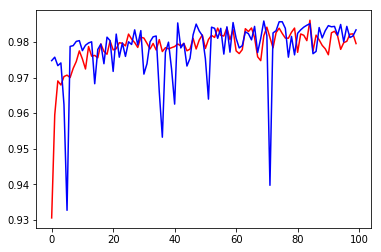

In [28]:
plt.plot(range(100), hist.history['acc'], 'r', label='Train acc')
plt.plot(range(100), hist.history['val_acc'], 'b', label='Test acc')

## Polt the training loss and testing loss

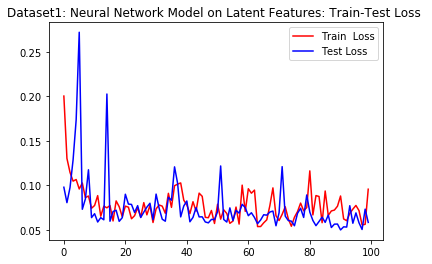

In [29]:
plt.plot(range(100), hist.history['loss'], 'r', label='Train  Loss')
plt.plot(range(100), hist.history['val_loss'], 'b', label='Test Loss')
plt.title("Dataset1: Neural Network Model on Latent Features: Train-Test Loss ")
plt.legend()